In [1]:
import numpy as np
#머신러닝에서 사용하는건데, anaconda에 기본적으로 깔려있다.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline


In [2]:
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'
ch_str = '统一码'

In [3]:
print(ko_str[1])

것


In [4]:
#ord : 아스키 코드값을 가져온다.
#기본적으로 어느나라 언어인지, 캐릭터(문자)의 범위가지고, 알 수 있어서, 유추가 가능하다.
print(ord(ko_str[0]))
print(ord(ja_str[0]))
print(ord(en_str[0]))
print(ord(ch_str[0]))

51060
12371
84
32479


In [5]:
#각각의 언어마다, 문자의 빈도수가 다르다.
#유니코드는 0부터 65536까지
# Unicode 코드 포인트로 출현 빈도 판정하기 --- (*1)
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기 --- (*2)
    counter = np.zeros(65535)
    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기 --- (*3)
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기 --- (*4)
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기 --- (*5)
    counter = counter/len(str)
    return counter
    

In [6]:
# 학습 전용 데이터 준비하기
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str), count_codePoint(ja_str), count_codePoint(en_str)]
y_train = ['ko','ja','en']

In [7]:
print(x_train[0]) #[0]이므로, 한국어만
print(np.where(x_train[0]>0)) #0이 아닌곳의 인덱스를 출력, 한글은 음절 단위로 모두 기록되어 있다.

idx = np.where(x_train[0]>0)

data = x_train[0]
print(data[idx]) #발생빈도수가, 0보다 큰것들의 빈도수를 표시

[0. 0. 0. ... 0. 0. 0.]
(array([   32,    46, 44163, 44397, 45768, 45796, 47928, 50612, 51008,
       51060, 51077, 51109, 54620], dtype=int64),)
[0.14285714 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


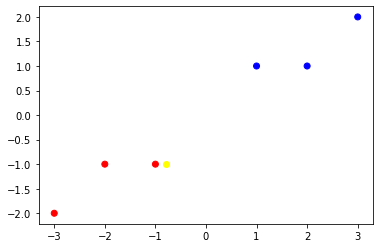

In [8]:
#그냥 이건 위의것과 상관 없음, 이해를 위해서
import matplotlib.pyplot as plt
#X = np.array([[-1, -1], [3, 2]])
#Y = np.array([1,  2])
#데이터가 별로 없어서, 딥러닝은 힘들다. 풀어봤자, 풀리지 않는다. 샘플개수 3개다.

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

#빨간색이 1, 파란색이 2
#Y = np.array([1, 1, 1, 2, 2, 2])
#이렇게 줘도 된다.
Y = np.array(['r', 'r', 'r', 'b', 'b', 'b'])

#color = [ 'red' if y == 1 else 'blue' for y in Y]
color = [ 'red' if y == 'r' else 'blue' for y in Y]

#X[np.array의 전체 괄호의 0번 인덱스, 1번 인덱스]
plt.scatter(X[:, 0], X[:, 1], color=color)

t = np.array([[-0.8, -1]]) #테스트 데이터

plt.scatter(t[:,0], t[:,1], color='yellow')

In [9]:
clf = GaussianNB() #특정 조건이 주어졌을때, 확률값을 가져가는것
clf.fit(X, Y)
#Y는 같은 애들인지 아닌지 구분하기 위해서이지, 연산에 활용하지는 않는다.

#-0.8, -1에 해당하는 애들이 어디라고 예측하는가?
#똑같은것
print(clf.predict([[-0.8, -1]]))
print(clf.predict(t))

#언어에서는 데이터 3개에 65536차원이 된다. 행 3개, 열 65536

['r']
['r']


In [10]:
#데이터가 적을 때, 가장 단순하게 사용할 수 있는 알고리즘
clf.fit([[0,0], [0,1], [1,0], [1,1]], [0,1,1,0])
print(clf.predict([[0, 1]]))

[0]


In [11]:
#학습하기 
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
########0 ~ 65536까지 아스키코드의 분포를 파악하여, 어느 나라 언어인지 파악한다.
y_pred = clf.predict([count_codePoint('안녕, 어디야')])
print(y_pred)

['ko']


In [13]:
# 평가 전용 데이터 준비하기
en_test_str = 'Hello'
ja_test_str = 'こんにちは'
ko_test_str = '안녕, 어디야?'

x_test = [count_codePoint(en_test_str), count_codePoint(ja_test_str), count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기 --- (*7)
y_pred = clf.predict(x_test)
print(y_pred) #예측
print(y_test) #정답
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ko']
['en', 'ja', 'ko']
정답률 =  1.0


<h1>문자셋이 동일한 경우?</h1>

<h2>알파벳을 쓰는 국가들은, 알파벳 빈도수로 구분을 한다.</h2>

In [14]:
#언어 하나당 하나의 파일로 구분되어 있다.
# 학습 데이터 준비하기 --- (*1)
x_train = []
y_train = []
#소스코드와 train폴더와 test폴더는 한 경로 안에 존재해야한다.
for file in glob.glob('./train/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    print(file)
    y_train.append(file[8:10]) #전체 경로 명에서 8번째에서 9번째까지 가져오라는 의미 
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        #전체 문장을 하나의 문자열로 변환
        file_str = file_str + line
    # 학습 데이터 준비하기 --- (*1)
    x_train.append(count_codePoint(file_str))

./train\de_cat.txt
./train\de_dog.txt
./train\de_elephant.txt
./train\en_cat.txt
./train\en_dog.txt
./train\en_elephant.txt
./train\es_cat.txt
./train\es_dog.txt
./train\es_elephant.txt


In [15]:
# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred = clf.predict([count_codePoint('hello. my name is ')])
print(y_pred)

['de']


In [17]:
# 평가 데이터 준비하기 --- (*4)
x_test = []
y_test = []
for file in glob.glob('./test/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기
    y_test.append(file[7:9])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line
    x_test.append(count_codePoint(file_str)) 

# 평가하기
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))  
        

['de' 'en' 'es']
정답률 =  1.0


<h1>2. 단어 빈도수 기반 자연어 처리</h1>
단어 빈도수 기반

In [18]:
#단어 

In [19]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do',
    'what should',
    'should what'
]

In [20]:
#join이라는 함수

str = " ".join(corpus)
print(str)

words = str.split(' ') #내가 구분하고 싶은 구분자
print(words)

freq = {} #딕셔너리 초기화

#단어 수만큼 루프를 돈다. 이렇게만 쓰면 에러난다. freq가 비어있어서 읽어올 수가 없다.
#for w in words: 
#    freq[w] = freq[w] + 1
    
for w in words: 
    freq[w] = freq.get(w, 0) + 1
print(freq)
print(freq["I"])

you know I want your love I like you what should I do what should should what
['you', 'know', 'I', 'want', 'your', 'love', 'I', 'like', 'you', 'what', 'should', 'I', 'do', 'what', 'should', 'should', 'what']
{'you': 2, 'know': 1, 'I': 3, 'want': 1, 'your': 1, 'love': 1, 'like': 1, 'what': 3, 'should': 3, 'do': 1}
3


In [21]:
vector = CountVectorizer() #글자수가 1개짜리는 의미가 없다고 생각해서, 빼버린다.
tf = vector.fit_transform(corpus) #원핫인코딩하고는 조금 다르다. 여기서는, 단어 존재유무가 들어있다. 1개이상이면, 1, 없으면 0

print(tf) #sparse한 행렬이라, 이렇게 표현하는게 좋다. 0자리는 필요 없다.
print(tf.toarray()) #원핫 인코딩 되었음을 알 수 있다. 결국 같은 의미, dense한 행렬

#위부터 
#'you know I want your love',
#'I like you',
#'what should I do'

#무슨자리인지 알아보고 싶으면, 한 단어만 corpus에 넣고 비교해본다. 이 방식은 단어의 위치를 고려하지 않는다.

  (0, 7)	1
  (0, 1)	1
  (0, 5)	1
  (0, 8)	1
  (0, 3)	1
  (1, 7)	1
  (1, 2)	1
  (2, 6)	1
  (2, 4)	1
  (2, 0)	1
  (3, 6)	1
  (3, 4)	1
  (4, 6)	1
  (4, 4)	1
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 0]]


In [22]:
print(tf.shape) #(문장수, 단어수)

(5, 9)


In [23]:
#각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.
#알파벳순 정렬
print(vector.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [24]:
#이런식으로, 원하는 단어의 인덱스를 찾을 수 있다.

print(vector.vocabulary_['you'])
print(vector.vocabulary_.get('you'))   

7
7


In [25]:
words = vector.get_feature_names()
#딕셔너리는 순서가 없다.
words = vector.get_feature_names()
for word in words:
    print(word)
    
for key in vector.vocabulary_: 
    print(key, vector.vocabulary_[key])

do
know
like
love
should
want
what
you
your
you 7
know 1
want 5
your 8
love 3
like 2
what 6
should 4
do 0


<h1>2. TF-IDF(Term Frequency - Inverse Document Frequency) #행렬로 표시된다.</h1>
<h1>TF : 현재 문서에서 단어 A가 나타난 횟수 #TF가 크다. 의미가 크다. 자주 나온다.</h1>
<h1>DF : 단어가 나타난 문서의 수  #DF가 크다. 흔한 단어다.</h1>
<h1>TF-IDF</h1>
<h1>특정 단어의 상대적인 빈도를 나타내 주는 값, 즉, IDF는 희귀도라고 보면 된다.</h1>
<h1>값이 클 수록 내 문서에만 많이 언급되는 단어(=다른 문서에서는 잘 언급 안됨)</h1>
<h1>값이 작을수록 다른 문서에서 잘 언급하는 단어를 의미(현재 문서와 관련 없음)</h1>

In [26]:
sent = ["오늘 휴일", 
        "휴일 오늘", 
        "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.", 
        " 내일 은 반가운 비 소식 이 있습니다."] 

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화 진행, #sent는 리스트
print(tfidf_matrix)
print(type(tfidf_matrix))

  (0, 17)	0.6437444595062429
  (0, 7)	0.7652405313723362
  (1, 17)	0.6437444595062429
  (1, 7)	0.7652405313723362
  (2, 12)	0.28487998702172107
  (2, 6)	0.28487998702172107
  (2, 4)	0.28487998702172107
  (2, 1)	0.28487998702172107
  (2, 9)	0.35310140100264525
  (2, 14)	0.28487998702172107
  (2, 8)	0.35310140100264525
  (2, 13)	0.35310140100264525
  (2, 5)	0.35310140100264525
  (2, 17)	0.19893117008503197
  (2, 7)	0.23647612349029334
  (3, 11)	0.3542556015420614
  (3, 16)	0.3542556015420614
  (3, 3)	0.3542556015420614
  (3, 10)	0.3542556015420614
  (3, 0)	0.3542556015420614
  (3, 2)	0.3542556015420614
  (3, 15)	0.3542556015420614
  (3, 14)	0.28581118874948447
  (3, 17)	0.1995814265359179
  (4, 12)	0.5
  (4, 6)	0.5
  (4, 4)	0.5
  (4, 1)	0.5
<class 'scipy.sparse.csr.csr_matrix'>


In [27]:
#5는 문서의수, 18은 문서의 사이즈(단어의 수)
#수가 높을 수록, 여기서는 자주 언급되고, 다른데서는 잘 언급이 안된다.
print(tfidf_matrix.toarray().shape)
print(tfidf_matrix.toarray())

(5, 18)
[[0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.28487999 0.         0.         0.28487999 0.3531014
  0.28487999 0.23647612 0.3531014  0.3531014  0.         0.
  0.28487999 0.3531014  0.28487999 0.         0.         0.19893117]
 [0.3542556  0.         0.3542556  0.3542556  0.         0.
  0.         0.         0.         0.         0.3542556  0.3542556
  0.         0.         0.28581119 0.3542556  0.3542556  0.19958143]
 [0.         0.5        0.         0.         0.5        0.
  0.5        0.         0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.        ]]


In [28]:
#이걸 토대로 해석하면 된다. 18개다.
features = tfidf_vectorizer.get_feature_names()
print(features)

['갑작스런', '내일', '놀러왔다가', '망연자실', '반가운', '서쪽', '소식', '오늘', '으로', '이어졌는데요', '인해', '있습니', '있습니다', '중심', '폭염', '피해서', '하고', '휴일']


In [29]:
#n번째 문장에서의 오늘과 휴일의 tf-idf값
mat = np.asarray(tfidf_matrix.toarray())
srch = ["오늘", "휴일"]
#오늘과 휴일에 대한 get(i)값은 7, 17
print([  tfidf_vectorizer.vocabulary_.get(i) for i in srch])
#vocabulary는 dictionary형태이다.
srch_dtm = mat[:, [  tfidf_vectorizer.vocabulary_.get(i) for i in srch]]
#즉, 이것은 srch_dim = mat[:,[7, 17]]과 같은뜻

#모든 문장에 대하여, 7번 인덱스 단어 즉, 오늘이라는 단어의 tf-idf값

#srch_dtm = mat[:, [ 7,17]]   
#srch_dtm = mat[:, 7]   

print(srch_dtm)

[7, 17]
[[0.76524053 0.64374446]
 [0.76524053 0.64374446]
 [0.23647612 0.19893117]
 [0.         0.19958143]
 [0.         0.        ]]


In [30]:
#유사도 계산
#알파벳 한개나, 음절 1개는 단어로 처리하지 않는다.

#"오늘" + "휴일"
score = srch_dtm.sum(axis=1)

#오늘이라는 단어가 굉장히 강력한 단어이다.
print(score)

for i in range(len(score)):
    if score[i] > 0:
        print('{} / score : {}'.format(sent[i], score[i])) 

[1.40898499 1.40898499 0.43540729 0.19958143 0.        ]
오늘 휴일 / score : 1.408984990878579
휴일 오늘 / score : 1.408984990878579
휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다. / score : 0.4354072935753253
폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다. / score : 0.1995814265359179


In [32]:
#tf-idf계산하는 공식이 사실 여러개 있다.
sentences = ['This is the first document.',
              'This is the second document.',
              'And the third one.',
              'Is this the first document?']
vect = TfidfVectorizer()
X = vect.fit_transform(sentences)

<img src="./tfidf.png">

In [33]:
#학습시키기
y = [1,2,3,4]
model =  SGDClassifier(loss='perceptron')  
model.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
X_pred = vect.transform(['My new document third'])
y_pred = model.predict(X_pred)
#3번째 문장과 가장 유사하다고 판단한다.
print(y_pred)

[3]
